/var/folders/yv/kbb9q2f16z755yyqqbfpb7b00000gn/T/ipykernel_67267/33151221.py:12: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  data = data.fillna(data.mean())
/Users/huzaifashafiq/miniforge3/envs/BMEN/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)



Cross-Validation Scores: [0.96491228 0.85964912 0.9122807  0.89473684 0.92982456 0.89473684
 0.89473684 0.94736842 0.92982456 0.94642857]

Average Cross-Validation Score: 0.9174498746867167

Accuracy: 0.935672514619883

Confusion Matrix:
 [[100   8]
 [  3  60]]

Classification Report:
               precision    recall  f1-score   support

           B       0.97      0.93      0.95       108
           M       0.88      0.95      0.92        63

    accuracy                           0.94       171
   macro avg       0.93      0.94      0.93       171
weighted avg       0.94      0.94      0.94       171


AUC-ROC: 0.9391534391534392

F1 Score: 0.9361379643892844

Recall: 0.935672514619883

Precision: 0.9382608434278157

Balanced Accuracy: 0.9391534391534391
Confusion matrix:


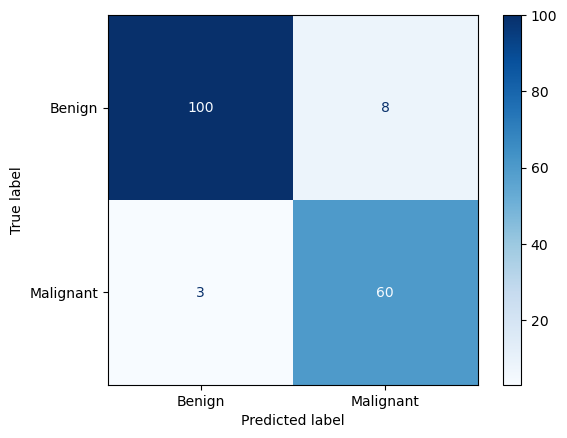

/Users/huzaifashafiq/miniforge3/envs/BMEN/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


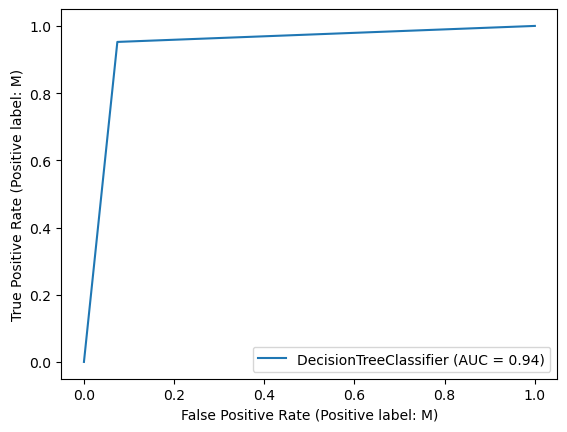

In [6]:

import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import f1_score, confusion_matrix, plot_confusion_matrix, plot_roc_curve, recall_score, precision_score, balanced_accuracy_score, roc_auc_score
import matplotlib.pyplot as plt

# Load data from CSV file
data = pd.read_csv("breast-cancer.csv")

# Fill missing values with the mean of the respective column
data = data.fillna(data.mean())

# Define the features and target variables
X = data.drop('diagnosis', axis=1)
y = data['diagnosis']

# Create the Decision Tree classifier
classifier = DecisionTreeClassifier(random_state=42)

# Add k-fold cross-validation
k = 10
cv_scores = cross_val_score(classifier, X, y, cv=k)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train the classifier using the training data
classifier.fit(X_train, y_train)

# Make predictions on the test data
y_pred = classifier.predict(X_test)

# Get predicted probabilities for the positive class
y_pred_proba = classifier.predict_proba(X_test)[:, 1]

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)
auc_roc = roc_auc_score(y_test, y_pred_proba)
f1 = f1_score(y_test, y_pred, average="weighted")
recall = recall_score(y_test, y_pred, average="weighted")
precision = precision_score(y_test, y_pred, average="weighted")
balanced_accuracy = balanced_accuracy_score(y_test, y_pred)


# Print the results
print("\nCross-Validation Scores:", cv_scores)
print("\nAverage Cross-Validation Score:", cv_scores.mean())
print("\nAccuracy:", accuracy)
print("\nConfusion Matrix:\n", conf_matrix)
print("\nClassification Report:\n", class_report)
print("\nAUC-ROC:", auc_roc)
print("\nF1 Score:", f1)
print("\nRecall:", recall)
print("\nPrecision:", precision)
print("\nBalanced Accuracy:", balanced_accuracy)

print("Confusion matrix:")
plot_confusion_matrix(classifier, X_test, y_test, display_labels=['Benign', 'Malignant'], cmap=plt.cm.Blues)
plt.show()

# Plot ROC curve
plot_roc_curve(classifier, X_test, y_test)
plt.show()